# Examen de Sistemas Inteligentes junio 2024
## Parte práctica
### Nombre del alumno

Pon aquí tu nombre.

***

**Instrucciones:** Carga el fichero pet_adoption_data.csv, y contexta las preguntas debajo de los encabezados.


### Ejercicio 1

 Limpia el dataset de errores y formatéalo para poder ser usado por cualquier
algoritmo. La idea es que la limpieza sea común a los diferentes algoritmos usados para que la
comparativa posterior tenga sentido. (1p)


In [14]:
#Entorno utilizado para la practica : Python 3.12.7 distribución anaconda
#procedemos a cargar las librerías y también los datos
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#definimos una variable para poder cargar más comodamente los ejemplos
filas_ejemplo=3
debug= False

#cargamos los datos en una variable 
datos = pd.read_csv("pet_adoption_data.csv")

#mostramos los datos para saber con qué trabajamos exactamente
display (datos.head(n=filas_ejemplo)) 
#mostramos el número de filas y columnas existentes
if(debug):
    display(f"Filas existentes {datos.index.size} Columnas existentes {datos.columns.size}")

#vista de datos únicos
if(debug):
    for i in datos.columns:
        display(f"columna= {i}" ,datos[i].unique())

#comprobamos que no haya nulos

display("lista de nulos",datos.isnull().sum())

#vemos los datos que son nulos (por si se puede solucionar)
if debug:
    display("pre tratados " ,datos[datos.isnull().any(axis=1)])

datos = datos.dropna(subset=['PetID'])
datos= datos.dropna(subset=['WeightKg'])

#cambiamos los id para que sean de tipo entero
datos['PetID'] = np.ceil(datos['PetID']).astype(int)

#display("POST tratados" ,datos[datos.isnull().any(axis=1)])
if debug:
    display(datos[datos["Breed"]== "Parakeet"])
#vemos que parakeet es de petType bird por lo que lo cambiamos en su nulo


#corregimos el dato del pajaro que estaba mal
datos["PetType"]= np.where(datos["PetID"]==614,'Bird',datos["PetType"])

if(debug):
    display("POST tratados" ,datos[datos.isnull().any(axis=1)])
    display(datos.isnull().sum())

display (datos.head(n=filas_ejemplo))


#usamos one hot encoder para codificar los atributos que queremos

encoder = OneHotEncoder(sparse_output=False)

array= ["PetType","Breed","Color"]

for i in array:
    aux_HOT= encoder.fit_transform(datos[i].to_numpy().reshape(-1,1))
    if debug:
        display(i)

    column_names = encoder.get_feature_names_out([i])

    datos=pd.concat([datos, pd.DataFrame(aux_HOT,columns=column_names,index=datos.index)],axis=1)
    #eliminamos la columna ya tratada
    datos=datos.drop(i,axis=1)

display(datos["Size"].unique())


#cambiamos los tamaños por enteros para categorizarlos
datos["Size"] = datos["Size"].map({
    'Large': 3,
    'Medium': 2,
    'Small': 1
})

#escalamos los datos para poder usarlos más facilmente

scaler =MinMaxScaler()
datos["AgeMonths"]= scaler.fit_transform(datos[["AgeMonths"]])
datos["WeightKg"]= scaler.fit_transform(datos[["WeightKg"]])
datos["TimeInShelterDays"]= scaler.fit_transform(datos[["TimeInShelterDays"]])
datos["AdoptionFee"]= scaler.fit_transform(datos[["AdoptionFee"]])

display (datos)


,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500.0,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501.0,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502.0,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0


'lista de nulos'

PetID                 2
PetType               1
Breed                 0
AgeMonths             0
Color                 0
Size                  0
WeightKg              1
Vaccinated            0
HealthCondition       0
TimeInShelterDays     0
AdoptionFee           0
PreviousOwner         0
AdoptionLikelihood    0
dtype: int64

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0


array(['Large', 'Medium', 'Small'], dtype=object)

,PetID,AgeMonths,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood,...,Breed_Parakeet,Breed_Persian,Breed_Poodle,Breed_Rabbit,Breed_Siamese,Color_Black,Color_Brown,Color_Gray,Color_Orange,Color_White
0,500,0.730337,3,0.138783,1,0,0.295455,0.280561,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,501,0.404494,3,0.520009,0,0,0.079545,0.470942,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,502,0.758427,2,0.036514,0,0,0.954545,0.771543,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,503,0.539326,1,0.080105,0,0,0.681818,0.434870,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,504,0.685393,3,0.672244,0,0,0.306818,0.028056,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,2502,0.398876,1,0.897969,1,0,0.738636,0.052104,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2003,2503,0.691011,1,0.127988,1,1,0.659091,0.300601,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2004,2504,0.629213,1,0.025551,1,0,0.761364,0.605210,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2005,2505,0.061798,3,0.688239,1,0,0.659091,0.957916,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Ejercicio 2

Muestra la distribución del datase mediante una gráfica, hazlo de la mejor forma
posible. (1p)

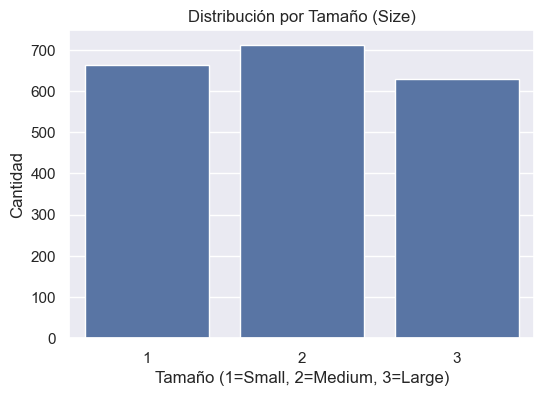

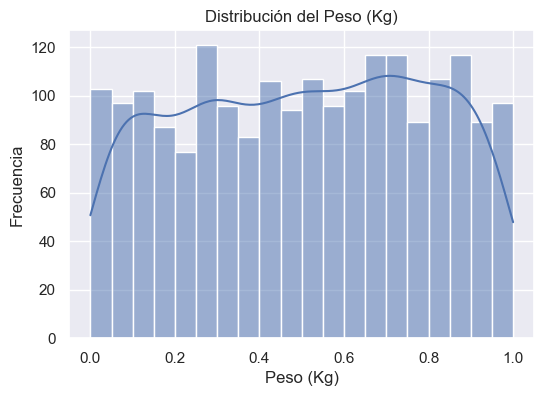

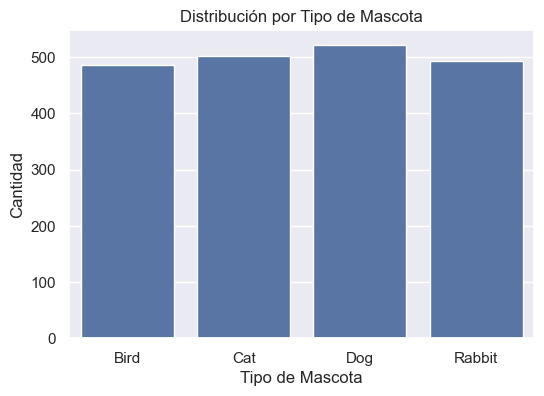

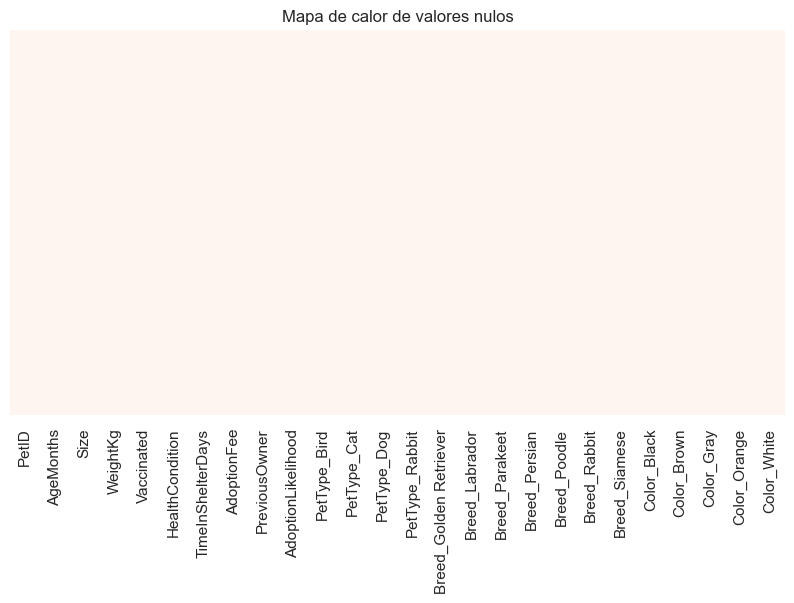

Text(0, 0.5, 'Segunda componente principal')

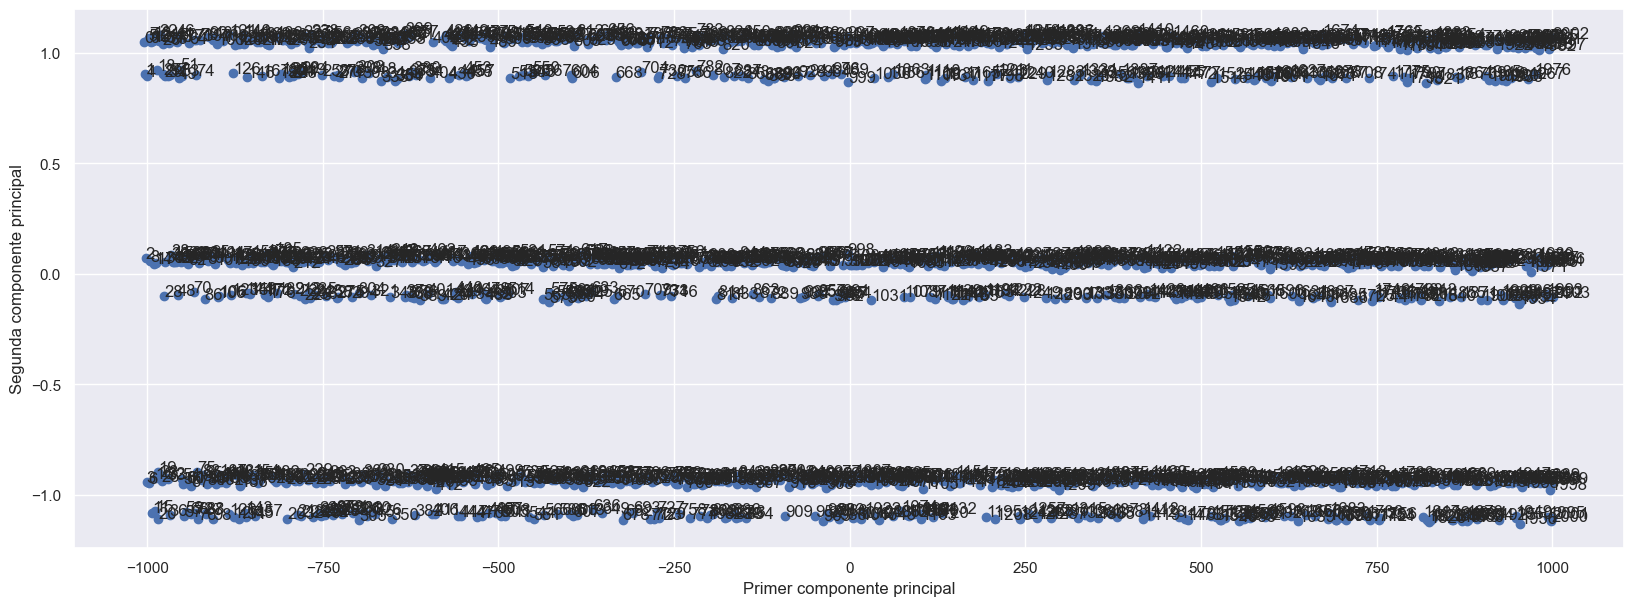

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

# 1. Distribución de 'Size'
plt.figure(figsize=(6,4))
sns.countplot(x='Size', data=datos, order=[1, 2, 3])
plt.title('Distribución por Tamaño (Size)')
plt.xlabel('Tamaño (1=Small, 2=Medium, 3=Large)')
plt.ylabel('Cantidad')
plt.show()

# 2. Histograma del peso
plt.figure(figsize=(6,4))
sns.histplot(datos['WeightKg'], bins=20, kde=True)
plt.title('Distribución del Peso (Kg)')
plt.xlabel('Peso (Kg)')
plt.ylabel('Frecuencia')
plt.show()

# 3. Distribución de tipo de mascota (antes de codificación)
# Asumimos que todavía tienes las columnas codificadas como 'PetType_Dog', etc.
pettype_cols = [col for col in datos.columns if col.startswith('PetType_')]
if pettype_cols:
    pettype_counts = datos[pettype_cols].sum()
    plt.figure(figsize=(6,4))
    sns.barplot(x=pettype_counts.index.str.replace("PetType_", ""), y=pettype_counts.values)
    plt.title('Distribución por Tipo de Mascota')
    plt.xlabel('Tipo de Mascota')
    plt.ylabel('Cantidad')
    plt.show()

# 4. Heatmap de valores nulos
plt.figure(figsize=(10,5))
sns.heatmap(datos.isnull(), cbar=False, cmap='Reds', yticklabels=False)
plt.title('Mapa de calor de valores nulos')
plt.show()


from sklearn.decomposition import PCA

# Creación del modelo de PCA con 100 componentes
pca = PCA(n_components = 26)

# Ajuste y transformación de los datos
pca.fit(datos)
X_pca = pca.transform(datos)
X_pca.shape
fig, ax = plt.subplots(figsize = (20, 7))

# Hacemos un scatter plot de cada uno de los datos
ax.scatter(X_pca[:, 0], X_pca[:, 1])

# Por cada dato escribimos a qué instancia corresponde
for i in range(datos.shape[0]):
    ax.text(X_pca[i, 0], X_pca[i, 1], s = i)

ax.set_xlabel('Primer componente principal')
ax.set_ylabel('Segunda componente principal')



### Ejercicio 3

Utiliza un perceptrón multicapa para construir el clasificador. El porcentaje de
validación debe ser del 20% y un random_state de 13 tanto en la partición como en el uso del
algoritmo. Se espera un accuracy igual o mayor al 91%. (1p)


In [16]:
#code here
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import random
from sklearn.metrics import confusion_matrix, accuracy_score

if debug:
    import matplotlib.pyplot as plt
    import seaborn as sns


    correlation_matrix = datos.corr()

    plt.figure(figsize=(20,20))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Matriz de Correlación')
    plt.show()

TAM_ENTRENAMIENTO=0.8

target= datos["AdoptionLikelihood"]
X = datos.drop(columns=["AdoptionLikelihood","PetID"])

semilla = 13

x_train, x_test, y_train, y_test = train_test_split(X, target, train_size = TAM_ENTRENAMIENTO, random_state = semilla)

if debug:
    param_grid = {
        'hidden_layer_sizes': [
            (16,),
            (32,),
            (64,),
            (32,16),
            (64, 32)
            
            ],
        'alpha': [0.0001, 0.001, 0.01],
        'max_iter': [300,400,500]
    }

    mlp_param = MLPClassifier(solver='adam', random_state=13,shuffle=True,early_stopping=False)

    from sklearn.model_selection import RandomizedSearchCV


    random_search = RandomizedSearchCV(
        estimator=mlp_param,
        param_distributions=param_grid,
        n_iter=50,  # prueba con 50 combinaciones
        cv=3,
        scoring='accuracy',
        verbose=1,
        random_state=semilla,
        n_jobs=-1
    )
    random_search.fit(x_train, y_train)
    print(random_search.best_params_)

print(f"tamaño de los datos de entrenamiento:{x_train.shape}")
print(f"tamaño de los datos de test:{x_test.shape}")

#red neuronal (MLPClassifier) IMPORTANTE QUITAR ID YA QUE NO ES RELEVANTE
mlp = MLPClassifier(hidden_layer_sizes=(32, 16), activation='relu', max_iter=300,solver='adam',early_stopping=False,alpha=0.001,random_state=semilla,shuffle=True)
mlp.fit(x_train, y_train)
y_pred_mlp = mlp.predict(x_test)

print(f'Precisión: {accuracy_score(y_test, y_pred_mlp)}')
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_mlp))




tamaño de los datos de entrenamiento:(1603, 24)
tamaño de los datos de test:(401, 24)
Precisión: 0.9251870324189526
Matriz de confusión:
 [[253  11]
 [ 19 118]]


### Ejercicio 4

 Utiliza un árbol de decisión para crear un segundo clasificador. El porcentaje de
validación debe ser del 20% y un random_state de 13 tanto en la partición como en el uso del
algoritmo. Se espera al menos un accuracy del 91%. (1p)

In [17]:
from sklearn.tree import DecisionTreeClassifier
TAM_ENTRENAMIENTO=0.8

target= datos["AdoptionLikelihood"]
X = datos.drop(columns=["AdoptionLikelihood","PetID"])
semilla=13

x_train, x_test, y_train, y_test = train_test_split(X, target, train_size = TAM_ENTRENAMIENTO, random_state = semilla,shuffle=True)

if debug:
    #miramos las más relevantes
    importancias = dtClass.feature_importances_
    features = X.columns

    plt.barh(features, importancias)
    plt.xlabel("Importancia")
    plt.title("Importancia de variables")
    plt.show()

    #probamos diferentes hiper parámetros
    params = {
        "max_depth": [3, 5, 10, 20, None],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4, 8],
        "criterion": ["gini", "entropy"]
    }

    grid = GridSearchCV(DecisionTreeClassifier(random_state=semilla), params, cv=5)
    grid.fit(x_train, y_train)

    #conseguimos los mejores
    print(f"Mejores parámetros: {grid.best_params_}")
    y_pred = grid.predict(x_test)
    #vemos el mayor fit conseguido
    print(f'Acuraccy optimizado: {accuracy_score(y_test, y_pred)}')
    print(confusion_matrix(y_test, y_pred))


print(f"tamaño de los datos de entrenamiento:{x_train.shape}")
print(f"tamaño de los datos de test:{x_test.shape}")


# Create the model
dtClass = DecisionTreeClassifier(max_depth=10,min_samples_leaf=4,min_samples_split=2,criterion='gini')
dtClassFit = dtClass.fit(x_train, y_train)
y_pred_dt = dtClassFit.predict(x_test)

print(f'Acuraccy: {accuracy_score(y_test, y_pred_dt)}')
print(confusion_matrix(y_test, y_pred_dt))
print(f'Semilla={semilla}')




tamaño de los datos de entrenamiento:(1603, 24)
tamaño de los datos de test:(401, 24)
Acuraccy: 0.9351620947630923
[[253  11]
 [ 15 122]]
Semilla=13


### Ejercicio 5

 Muestra las métricas que consideres adecuadas para ambos modelos y determina de
forma argumentada cuál crees que es el mejor para clasificar este problema. (1p)

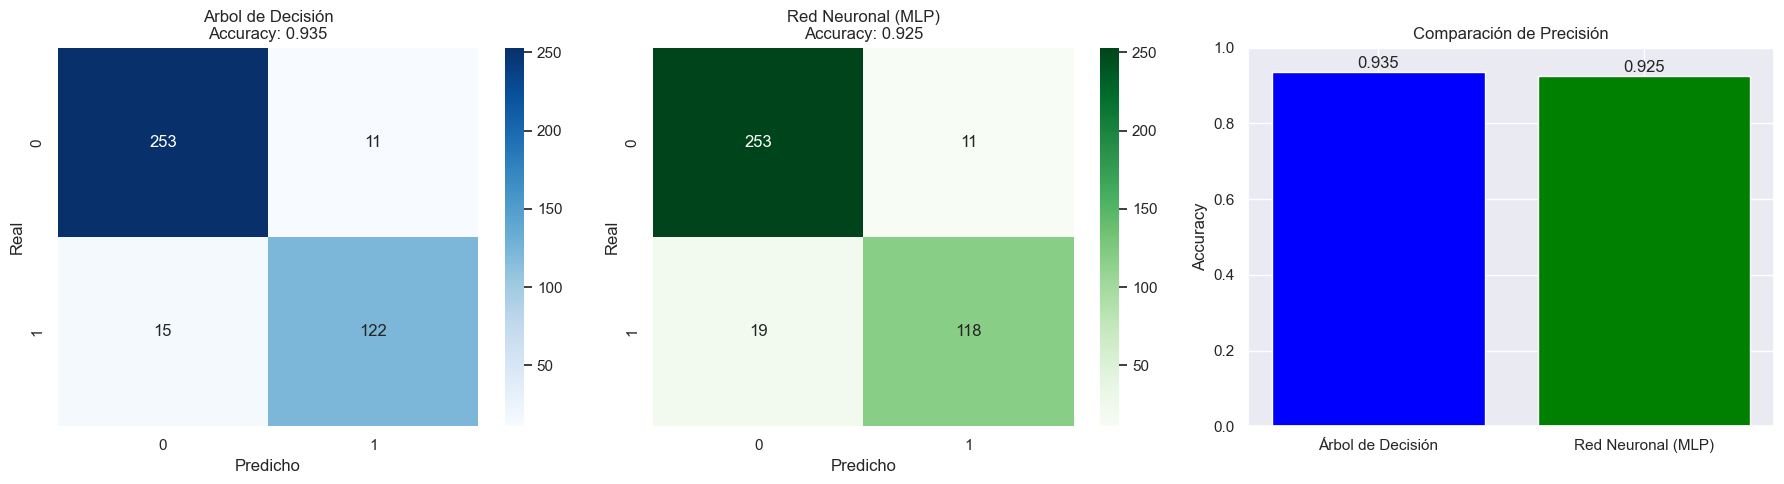

In [18]:
#code here
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# Asumimos que ya tienes:
# y_test, y_pred_dt (del árbol de decisión), y_pred_mlp (de la red neuronal)

# Calcular matrices de confusión
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_mlp = confusion_matrix(y_test, y_pred_mlp)

# Calcular accuracies
acc_dt = accuracy_score(y_test, y_pred_dt)
acc_mlp = accuracy_score(y_test, y_pred_mlp)

# Crear gráfico de matrices de confusión
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title(f'Arbol de Decisión\nAccuracy: {acc_dt:.3f}')
axes[0].set_xlabel('Predicho')
axes[0].set_ylabel('Real')

sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title(f'Red Neuronal (MLP)\nAccuracy: {acc_mlp:.3f}')
axes[1].set_xlabel('Predicho')
axes[1].set_ylabel('Real')

# Crear gráfico de barras con accuracy
modelos = ['Árbol de Decisión', 'Red Neuronal (MLP)']
scores = [acc_dt, acc_mlp]

axes[2].bar(modelos, scores, color=['blue', 'green'])
axes[2].set_ylim(0, 1)
axes[2].set_ylabel('Accuracy')
axes[2].set_title('Comparación de Precisión')

for i, v in enumerate(scores):
    axes[2].text(i, v + 0.01, f"{v:.3f}", ha='center')

plt.tight_layout()
plt.show()

##Elegimos Árbol de decisiones ya que tiene mayor accuracy y ademas es un modelo de CAJA BLANCA por lo que es explicable a diferencia MLP que es un modelo de CAJA NEGRA
